In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X_train_norm = pd.read_csv('../data/processed/X_train_l2.csv')
X_test_norm = pd.read_csv('../data/processed/X_test_l2.csv')
y_train_binary = pd.read_csv('../data/processed/y_train_binary.csv')
y_test_binary = pd.read_csv('../data/processed/y_test_binary.csv')
y_train_multiclass = pd.read_csv('../data/processed/y_train_multiclass.csv')
y_test_multiclass = pd.read_csv('../data/processed/y_test_multiclass.csv')

Original feature count : 122
Reduced feature count  : 5
Explained variance (%) : 96.59825077289959


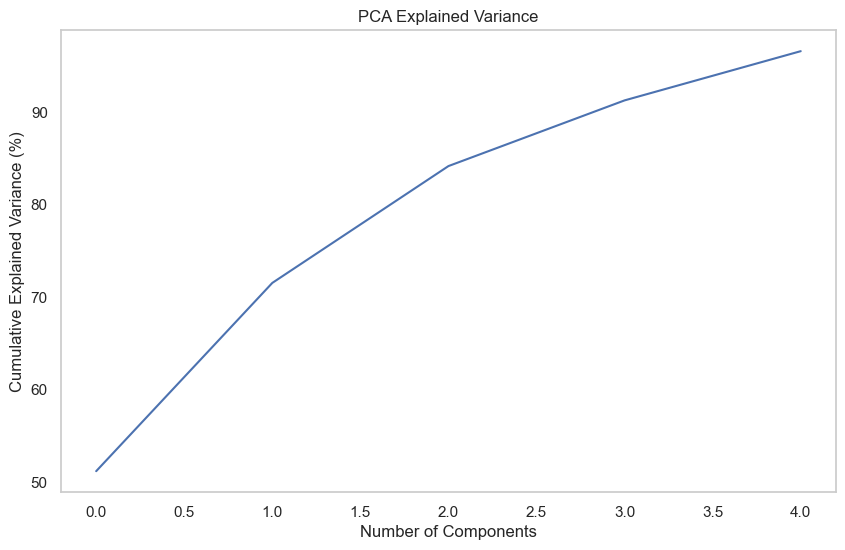

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
print("Original feature count :", X_train_norm.shape[1])
print("Reduced feature count  :", X_train_pca.shape[1])
print("Explained variance (%) :", pca.explained_variance_ratio_.sum() * 100)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train_binary)

y_pred_gnb = gnb.predict(X_test_pca)

print("Gaussian NB (with PCA)")
print(classification_report(y_test_binary, y_pred_gnb))


Gaussian NB (with PCA)
              precision    recall  f1-score   support

      attack       0.85      0.64      0.73     12833
      normal       0.64      0.85      0.73      9711

    accuracy                           0.73     22544
   macro avg       0.74      0.74      0.73     22544
weighted avg       0.76      0.73      0.73     22544



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(C=1.0, max_iter=5000, random_state=42)
svm_linear.fit(X_train_pca, y_train_binary)

y_pred_svm_lin = svm_linear.predict(X_test_pca)

print("Linear SVM (with PCA)")
print(classification_report(y_test_binary, y_pred_svm_lin))


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM (with PCA)
              precision    recall  f1-score   support

      attack       0.87      0.58      0.70     12833
      normal       0.62      0.88      0.73      9711

    accuracy                           0.71     22544
   macro avg       0.74      0.73      0.71     22544
weighted avg       0.76      0.71      0.71     22544



In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_pca, y_train_binary)

y_pred_rf = rf.predict(X_test_pca)

print("Random Forest (with PCA)")
print(classification_report(y_test_binary, y_pred_rf))

C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (with PCA)
              precision    recall  f1-score   support

      attack       0.97      0.65      0.77     12833
      normal       0.67      0.97      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.78     22544



In [18]:
# --- ensure numeric dtype ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_binary_enc = le.fit_transform(y_train_binary)
y_test_binary_enc = le.transform(y_test_binary)

# --- ANN model ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(100, activation="relu", input_shape=(X_train_pca.shape[1],)),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

model.fit(
    X_train_pca,
    y_train_binary_enc,
    validation_data=(X_test_pca, y_test_binary_enc),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

y_pred_ann = (model.predict(X_test_pca) > 0.5).astype(int)
print("ANN (with PCA)")
print(classification_report(y_test_binary_enc, y_pred_ann))

Epoch 1/200


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9319 - loss: 0.1818 - val_accuracy: 0.7654 - val_loss: 0.8389
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9607 - loss: 0.1090 - val_accuracy: 0.7718 - val_loss: 1.0495
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.0905 - val_accuracy: 0.7673 - val_loss: 1.1359
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0813 - val_accuracy: 0.7651 - val_loss: 1.2760
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0761 - val_accuracy: 0.7866 - val_loss: 1.2464
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0717 - val_accuracy: 0.7685 - val_loss: 1.2504
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0695 - val_accuracy: 0.7807 - val_loss: 1.2422
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0668 - val_accuracy: 0.7750

In [19]:
gnb.fit(X_train_pca, y_train_multiclass)

y_pred_gnb = gnb.predict(X_test_pca)

print("Gaussian NB Multiclass (with PCA)")
print(classification_report(y_test_multiclass, y_pred_gnb))

C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Gaussian NB Multiclass (with PCA)
              precision    recall  f1-score   support

         dos       0.77      0.61      0.68      7458
      normal       0.66      0.88      0.76      9711
       probe       0.30      0.44      0.35      2421
         r2l       0.00      0.00      0.00      2887
         u2r       0.00      0.00      0.00        67

    accuracy                           0.63     22544
   macro avg       0.34      0.39      0.36     22544
weighted avg       0.57      0.63      0.59     22544



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [20]:
rf = RandomForestClassifier(
    n_estimators=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_pca, y_train_multiclass)
y_pred_rf = rf.predict(X_test_pca)
print("Random Forest Multiclass (with PCA)")
print(classification_report(y_test_multiclass, y_pred_rf))



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Multiclass (with PCA)
              precision    recall  f1-score   support

         dos       0.91      0.75      0.83      7458
      normal       0.67      0.97      0.79      9711
       probe       0.73      0.55      0.63      2421
         r2l       0.43      0.07      0.12      2887
         u2r       0.56      0.07      0.13        67

    accuracy                           0.74     22544
   macro avg       0.66      0.48      0.50     22544
weighted avg       0.73      0.74      0.70     22544



In [21]:
svm = LinearSVC(C=1.0,
                random_state=42)

svm.fit(X_train_pca, y_train_multiclass)
y_pred_svm = svm.predict(X_test_pca)
print("Linear SVM Multiclass (with PCA)")
print(classification_report(y_test_multiclass, y_pred_svm))



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Multiclass (with PCA)
              precision    recall  f1-score   support

         dos       0.69      0.67      0.68      7458
      normal       0.60      0.92      0.73      9711
       probe       0.00      0.00      0.00      2421
         r2l       0.00      0.00      0.00      2887
         u2r       0.00      0.00      0.00        67

    accuracy                           0.62     22544
   macro avg       0.26      0.32      0.28     22544
weighted avg       0.49      0.62      0.54     22544



C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packag

In [22]:
y_train_multiclass_enc = le.fit_transform(y_train_multiclass)
y_test_multiclass_enc = le.transform(y_test_multiclass)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Dense(100, activation="relu", input_shape=(X_train_pca.shape[1],)),
    Dense(100, activation="relu"),
    Dense(5, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

model.fit(
    X_train_pca,
    y_train_multiclass_enc,
    validation_data=(X_test_pca, y_test_multiclass_enc),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1

)

y_pred_ann = np.argmax(model.predict(X_test_pca), axis=1)
print("ANN Multiclass (with PCA)")
print(classification_report(y_test_multiclass_enc, y_pred_ann))

Epoch 1/200


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`i

493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8916 - loss: 0.3620 - val_accuracy: 0.6818 - val_loss: 1.4461
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9288 - loss: 0.2185 - val_accuracy: 0.7008 - val_loss: 1.6576
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9382 - loss: 0.1900 - val_accuracy: 0.6997 - val_loss: 1.8344
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9444 - loss: 0.1709 - val_accuracy: 0.7225 - val_loss: 1.8798
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1573 - val_accuracy: 0.7263 - val_loss: 1.8747
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9534 - loss: 0.1480 - val_accuracy: 0.7108 - val_loss: 2.0244
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1415 - val_accuracy: 0.7261 - val_loss: 2.0071
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9563 - loss: 0.1355 - val_accuracy: 0.7199

C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packag